# Lab | Text Generation from Shakespeare's Sonnet

This notebook explores the fascinating domain of text generation using a deep learning model trained on Shakespeare's sonnets.

The objective is to create a neural network capable of generating text sequences that mimic the style and language of Shakespeare.

By utilizing a Recurrent Neural Network (RNN) with Long Short-Term Memory (LSTM) layers, this project aims to demonstrate how a model can learn and replicate the complex patterns of early modern English.

The dataset used consists of Shakespeare's sonnets, which are preprocessed and tokenized to serve as input for the model.

Throughout this notebook, you will see the steps taken to prepare the data, build and train the model, and evaluate its performance in generating text.

This lab provides a hands-on approach to understanding the intricacies of natural language processing (NLP) and the potential of machine learning in creative text generation.

Let's import necessary libraries

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku
import numpy as np

import matplotlib.pyplot as plt
import random
import os
import sys

# Reproducibility (best-effort, TF graphs can still introduce some nondeterminism)
import tensorflow as tf
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

print("Python:", sys.version)
print("TensorFlow:", tf.__version__)

Python: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
TensorFlow: 2.19.0


Let's get the data!

In [ ]:
import requests
url = 'https://raw.githubusercontent.com/martin-gorner/tensorflow-rnn-shakespeare/master/shakespeare/sonnets.txt'
resp = requests.get(url)
with open('sonnets.txt', 'wb') as f:
    f.write(resp.content)

data = open('sonnets.txt').read()

corpus = data.lower().split("\n")

data = open('sonnets.txt', 'r', encoding='utf-8').read()
corpus = data.lower().split("\n")
# Remove empty lines
corpus = [line.strip() for line in corpus if line.strip()]
len(corpus), corpus[0][:80]

(2321, 'sonnets')

Step 1: Initialise a tokenizer and fit it on the corpus variable using .fit_on_texts

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
print("Unique tokens:", len(tokenizer.word_index))

Unique tokens: 3374


Step 2: Calculate the Vocabulary Size

Let's figure out how many unique words are in your corpus. This will be the size of your vocabulary.

Calculate the length of tokenizer.word_index, add 1 to it and store it in a variable called total_words.

In [ ]:
# Your code here :
total_words = len(tokenizer.word_index) + 1
print("Vocabulary size:", total_words)


Vocabulary size: 3375


Create an empty list called input_sequences.

For each sentence in your corpus, convert the text into a sequence of integers using the tokenizer.
Then, generate n-gram sequences from these tokens.

Store the result in the list input_sequences.

In [ ]:
# Your code here :
# Create input sequences using the tokens
input_sequences = []

for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)


Calculate the length of the longest sequence in input_sequences. Assign the result to a variable called max_sequence_len.

Now pad the sequences using pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre').
Convert it to a numpy array and assign the result back to our variable called input_sequences.

In [ ]:
# Your code here :
# Calculate maximum sequence length and pad sequences
max_sequence_len = max(len(seq) for seq in input_sequences)
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre')
input_sequences = np.array(input_sequences)


Prepare Predictors and Labels

Split the sequences into two parts:

- Predictors: All elements from input_sequences except the last one.
- Labels: The last element of each sequence in input_sequences.

In [ ]:
# Your code here :

# Split sequences into predictors and labels
predictors = input_sequences[:, :-1]
labels = input_sequences[:, -1]


One-Hot Encode the Labels :

Convert the labels (which are integers) into one-hot encoded vectors.

Ensure the length of these vectors matches the total number of unique words in your vocabulary.

Use ku.to_categorical() on labels with num_classes = total_words

Assign the result back to our variable labels.

In [ ]:
# Your code here :

# One-hot encode the labels
labels = ku.to_categorical(labels, num_classes=total_words)



# Initialize the Model

Start by creating a Sequential model.

Add Layers to the Model:

Embedding Layer: The first layer is an embedding layer. It converts word indices into dense vectors of fixed size (100 in this case). Set the input length to the maximum sequence length minus one, which corresponds to the number of previous words the model will consider when predicting the next word.

Bidirectional LSTM Layer: Add a Bidirectional LSTM layer with 150 units. This layer allows the model to learn context from both directions (past and future) in the sequence. return_sequences=True

Dropout Layer: Add a dropout layer with a rate of 0.2 to prevent overfitting by randomly setting 20% of the input units to 0 during training.

LSTM Layer: Add a second LSTM layer with 100 units. This layer processes the sequence and passes its output to the next layer.

Dense Layer (Intermediate): Add a dense layer with half the total number of words as units, using ReLU activation. A regularization term (L2) is added to prevent overfitting.

Dense Layer (Output): The final dense layer has as many units as there are words in the vocabulary, with a softmax activation function to output a probability distribution over all words.

Vocabulary size: 3375


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.0188 - loss: 8.0200
Epoch 2/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.0203 - loss: 6.5643
Epoch 3/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.0200 - loss: 6.5017
Epoch 4/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.0214 - loss: 6.4595
Epoch 5/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.0227 - loss: 6.4276
Epoch 6/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.0256 - loss: 6.3947
Epoch 7/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.0260 - loss: 6.3304
Epoch 8/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.0349 - loss: 6.2774
Epoch 9/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.0370 - loss: 6.2286
Epoch 10/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.0380 - loss: 6.1460
Epoch 11/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.0398 - loss: 6.1233
Epoch 12/50
121/121 ━━━━━━━━━━━━━━━━━━━━

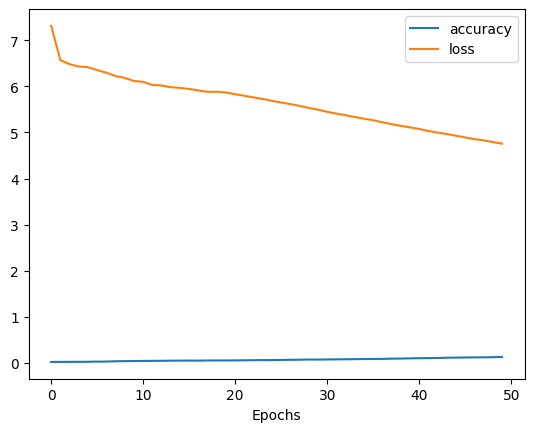

shall i compare thee to a summer day lies lie that thee thy love that which me spent spent gone be one ' be show me thy love


In [ ]:
# Import dependencies
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku
import numpy as np
import requests

# Load and preprocess data
url = 'https://raw.githubusercontent.com/martin-gorner/tensorflow-rnn-shakespeare/master/shakespeare/sonnets.txt'
resp = requests.get(url)
with open('sonnets.txt', 'wb') as f:
    f.write(resp.content)
data = open('sonnets.txt').read()
corpus = data.lower().split("\n")
corpus = [line.strip() for line in corpus if line.strip()]

# Tokenize text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)

# Vocabulary size
total_words = len(tokenizer.word_index) + 1
print("Vocabulary size:", total_words)

# Create input sequences
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# Pad sequences
max_sequence_len = max(len(seq) for seq in input_sequences)
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre')
input_sequences = np.array(input_sequences)

# Split predictors and labels
predictors = input_sequences[:, :-1]
labels = input_sequences[:, -1]

# One-hot encode labels
labels = ku.to_categorical(labels, num_classes=total_words)

# Define model
model = Sequential([
    Embedding(input_dim=total_words, output_dim=100, input_length=max_sequence_len - 1),
    Bidirectional(LSTM(150, return_sequences=True)),
    Dropout(0.2),
    LSTM(100),
    Dense(total_words // 2, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(total_words, activation='softmax')
])

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model.summary()

# Train model
history = model.fit(predictors, labels, epochs=50, batch_size=128, verbose=1)

# Plot accuracy and loss
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Text generation function
def generate_text(seed_text, next_words, tokenizer, max_sequence_len, model):
    text = seed_text
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = np.argmax(model.predict(token_list, verbose=0))
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        text += " " + output_word
    return text

# Example usage
seed_text = "shall i compare thee to a summer day"
print(generate_text(seed_text, 20, tokenizer, max_sequence_len, model))


# Compile the Model:

Compile the model using categorical crossentropy as the loss function, the Adam optimizer for efficient training, and accuracy as the metric to evaluate during training.

In [ ]:
# Your code here :

# Compile the Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Print Model Summary:

Use model.summary() to print a summary of the model, which shows the layers, their output shapes, and the number of parameters.

In [ ]:
# Your code here :
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 10, 100)        │       337,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 10, 300)        │       301,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 300)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 100)            │       160,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1687)           │       170,387 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3375)           │     5,697,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,666,487 (25.43 MB)

 Trainable params: 6,666,487 (25.43 MB)

 Non-trainable params: 0 (0.00 B)

# Now train the model for 50 epochs and assign it to a variable called history.

Training the model with 50 epochs should get you around 40% accuracy.

You can train the model for as many epochs as you like depending on the time and computing constraints you are facing. Ideally train it for a larger amount of epochs than 50.

That way you will get better text generation at the end.

However, dont waste your time.

In [ ]:
# Your code here :

# Train the model for 50 epochs
history = model.fit(predictors, labels, epochs=50, verbose=1)



Epoch 1/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.1238 - loss: 4.9078
Epoch 2/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.1242 - loss: 4.6392
Epoch 3/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.1261 - loss: 4.5545
Epoch 4/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.1320 - loss: 4.4591
Epoch 5/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.1392 - loss: 4.3810
Epoch 6/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.1418 - loss: 4.3011
Epoch 7/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.1518 - loss: 4.2057
Epoch 8/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.1638 - loss: 4.1217
Epoch 9/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.1728 - loss: 4.0747
Epoch 10/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.1798 - loss: 4.0035
Epoch 11/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.1901 - loss: 3.9506
Epoch 12/50
484/484 ━━━━━━━━━━━━━━━━━━━

# Use plt from matplotlib to plot the training accuracy over epochs and the loss over epochs

First you will have to get the accuracy and loss data over epochs, you can do this by using methods on your model.

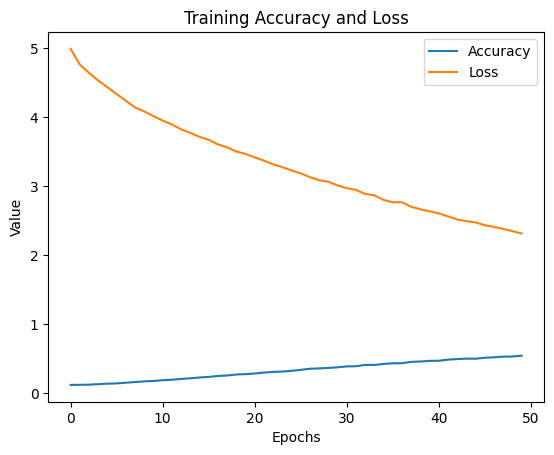

In [ ]:
# Your code here :

# Plot training accuracy and loss over epochs
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Training Accuracy and Loss')
plt.legend()
plt.show()


# Generate text with the model based on a seed text

Now you will create two variables :

- seed_text = 'Write the text you want the model to use as a starting point to generate the next words'
- next_words = number_of_words_you_want_the_model_to_generate

Please change number_of_words_you_want_the_model_to_generate by an actual integer.

In [ ]:
# Your code here :
# Generate text with the model based on a seed text
seed_text = "shall i compare thee to a summer day"
next_words = 20  # number of words to generate


Now create a loop that runs based on the next_words variable and generates new text based on your seed_text input string. Print the full text with the generated text at the end.

This time you dont get detailed instructions.

Have fun!

In [ ]:
# Your code here :

# Generate new text from the seed_text
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len - 1, padding='pre')
    predicted = np.argmax(model.predict(token_list, verbose=0))

    output_word = ''
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word

print(seed_text)


shall i compare thee to a summer day doth show thee thee doth show me you 'will ' seem life grace thee be spend gone grew that the


Experiment with at least 3 different seed_text strings and see what happens!

In [ ]:
# Your code here :
# Experiment with at least 3 different seed_text strings
seed_texts = [
    "love is not love",
    "when in disgrace with fortune",
    "my mistress eyes are nothing like the sun"
]

for seed_text in seed_texts:
    text = seed_text
    next_words = 20
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len - 1, padding='pre')
        predicted = np.argmax(model.predict(token_list, verbose=0))

        output_word = ''
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        text += " " + output_word

    print(f"\nSeed text: {seed_text}")
    print("Generated text:", text)



Seed text: love is not love
Generated text: love is not love this riches all fame appear hide me thy bright ' in all thy heart away keep a story or decay

Seed text: when in disgrace with fortune
Generated text: when in disgrace with fortune and compounds so deem'd deem'd greater thrall near dead near dead wealth 'will ' afford lame days afford give me

Seed text: my mistress eyes are nothing like the sun
Generated text: my mistress eyes are nothing like the sun inhearse view case near appear days ill large strong near ill more ' doth new ' so seem is less
